# Los Átomos de la Computación

Programar una computadora cuántica ahora es algo que cualquiera puede hacer en la comodidad de su hogar.

Pero ¿qué crear? ¿Qué es un programa cuántico de todos modos? De hecho, ¿qué es una computadora cuántica?

Estas preguntas se pueden responder haciendo comparaciones con computadoras digitales estándar. Desafortunadamente, la mayoría de las personas tampoco entienden cómo funcionan las computadoras digitales. En este artículo, veremos los principios básicos detrás de estos dispositivos. Para ayudarnos a hacer la transición a la computación cuántica más adelante, lo haremos usando las mismas herramientas que usaremos para lo cuántico.

A continuación se muestra un código de Python que necesitaremos ejecutar si queremos usar el código en esta página:

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

## 1. Dividir la información en bits <a id="bits"></a>

Lo primero que debemos conocer es la idea de bits. Estos están diseñados para ser el alfabeto más simple del mundo. Con solo dos caracteres, 0 y 1, podemos representar cualquier pieza de información.

Un ejemplo son los números. Probablemente estés acostumbrado a representar un número a través de una cadena de los diez dígitos 0, 1, 2, 3, 4, 5, 6, 7, 8 y 9. En esta cadena de dígitos, cada uno representa cuántas veces el número contiene una cierta potencia de diez. Por ejemplo, cuando escribimos 9213, queremos decir

$$ 9000 + 200 + 10 + 3 $$

o, expresado de una manera que enfatiza las potencias de diez

$$ (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$

Aunque generalmente usamos este sistema basado en el número 10, podemos usar uno basado en cualquier otro número. El sistema numérico binario, por ejemplo, se basa en el número dos. Esto significa usar los dos caracteres 0 y 1 para expresar números como múltiplos de potencias de dos. Por ejemplo, 9213 se convierte en 10001111111101, ya que


$$
\begin{aligned}
9213  &= (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11}) + (0 \times 2^{10}) \\
 &+ (1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) + (1 \times 2^6) \\
 &+ (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) \\
 &+ (0 \times 2^1) + (1 \times 2^0) 
\end{aligned}
$$



En esto, estamos expresando números como múltiplos de 2, 4, 8, 16, 32, etc. en lugar de 10, 100, 1000, etc.


In [ ]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

Estas cadenas de bits, conocidas como cadenas binarias, se pueden usar para representar más que solo números. Por ejemplo, hay una forma de representar cualquier texto utilizando bits. Para cualquier letra, número o signo de puntuación que quieras usar, puedes encontrar una cadena correspondiente de ocho bits como máximo usando [esta tabla](https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com.ibm.aix.networkcomm/conversion_table.htm). Aunque estos son bastante arbitrarios, este es un estándar ampliamente aceptado. De hecho, es lo que se utilizó para transmitirte este artículo a través de Internet.

Así es como se representa toda la información en las computadoras. Ya sean números, letras, imágenes o sonido, todo existe en forma de cadenas binarias.

Al igual que nuestras computadoras digitales estándar, las computadoras cuánticas se basan en esta misma idea básica. La principal diferencia es que utilizan *qubits*, una extensión del bit a la mecánica cuántica. En el resto de este libro de texto, exploraremos qué son los qubits, qué pueden hacer y cómo lo hacen. En esta sección, sin embargo, no estamos hablando de cuántica en absoluto. Entonces, solo usamos qubits como si fueran bits.

<!-- ::: q-block.exercise -->

## Ejercicio

Completa estas oraciones:

1. El número "5" en decimal es [[101|11001|110|001]] en binario.
2. Si nuestra computadora tiene 1 bit, puede estar en [[2|1|3|4]] estados diferentes.
3. Si nuestra computadora tiene 2 bits, puede estar en [[4|3|2|8]] estados diferentes.
4. Si nuestra computadora tiene 8 bits, puede estar en [[256|128|342]] estados diferentes.
5. Si tienes $n$ bits, pueden estar en [[$2^n$|$n×2$|$n^2$]] estados diferentes.

<!-- ::: -->


## 2. Computación como un diagrama <a id="diagram"></a>

Ya sea que usemos qubits o bits, debemos manipularlos para convertir las entradas que tenemos en las salidas que necesitamos. Para los programas más simples con muy pocos bits, es útil representar este proceso en un diagrama conocido como *diagrama de circuito*. Estos tienen entradas a la izquierda, salidas a la derecha y operaciones representadas por símbolos arcanos en medio. Estas operaciones se denominan 'compuertas', principalmente por razones históricas.

Aquí hay un ejemplo de cómo se ve un circuito para computadoras estándar basadas en bits. No se espera que entiendas lo que hace. Simplemente debería darte una idea de cómo se ven estos circuitos.

![imagen1](images/classical_circuit.png)

Para las computadoras cuánticas, usamos la misma idea básica pero tenemos diferentes convenciones sobre cómo representar entradas, salidas y los símbolos utilizados para las operaciones. Aquí está el circuito cuántico que representa el mismo proceso que el anterior.

![imagen2](images/quantum_circuit.png)

En el resto de esta sección, explicaremos cómo construir circuitos. Al final, sabrás cómo crear el circuito anterior, qué hace y por qué es útil.

## 3. Tu primer circuito cuántico <a id="first-circuit"></a>

En un circuito, normalmente necesitamos hacer tres trabajos: primero, codificar la entrada, luego hacer algunos cálculos reales y finalmente extraer una salida. Para tu primer circuito cuántico, nos centraremos en el último de estos trabajos. Comenzamos creando un circuito con ocho qubits y ocho salidas.

In [3]:
qc_output = QuantumCircuit(8)

Este circuito, que hemos llamado `qc_output`, lo crea Qiskit usando `QuantumCircuit`. El `QuantumCircuit` toma el número de qubits del circuito cuántico como argumento.

La extracción de salidas en un circuito cuántico se realiza mediante una operación llamada `measure_all()`. Cada medición le dice a un qubit específico que dé una salida a un bit de salida específico. El comando `qc_output.measure_all()` agrega una medición a cada qubit en el circuito `qc_output` y también agrega algunos bits clásicos para escribir la salida.

In [4]:
qc_output.measure_all()

Ahora que nuestro circuito tiene algo, echemos un vistazo.

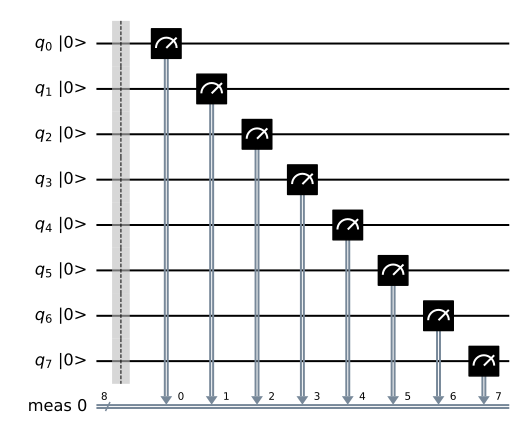

In [5]:
qc_output.draw(initial_state=True) 

Los qubits siempre se inicializan para dar la salida `0`. Dado que no hacemos nada con nuestros qubits en el circuito anterior, este es exactamente el resultado que obtendremos cuando los midamos. Podemos ver esto ejecutando el circuito muchas veces y graficando los resultados en un histograma. Veremos que el resultado siempre es `00000000`: un `0` por cada qubit.

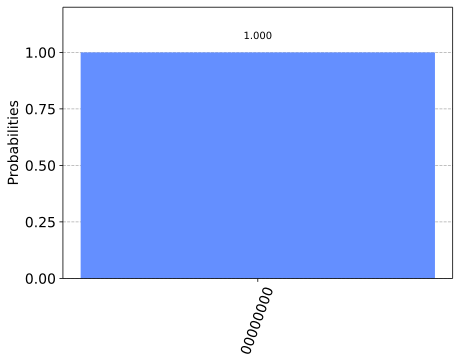

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

La razón para ejecutar muchas veces y mostrar el resultado como un histograma es que las computadoras cuánticas pueden tener cierta aleatoriedad en sus resultados. En este caso, dado que no estamos haciendo nada cuántico, solo obtenemos el resultado `00000000` con certeza.

Ten en cuenta que este resultado proviene de un simulador cuántico, que es una computadora estándar que calcula lo que haría una computadora cuántica ideal. Las simulaciones solo son posibles para una pequeña cantidad de qubits (~30 qubits), pero, sin embargo, son una herramienta muy útil al diseñar tus primeros circuitos cuánticos. Para ejecutarlo en un dispositivo real, solo necesitas reemplazar `Aer.get_backend('aer_simulator')` con el objeto de backend del dispositivo que deseas usar. 

## 4. Ejemplo: Creación de un Circuito Sumador <a id="adder"></a>

### 4.1 Codificar una entrada <a id="encoding"></a>

Ahora veamos cómo codificar una cadena binaria diferente como entrada. Para ello necesitamos lo que se conoce como compuerta NOT. Esta es la operación más básica que puedes hacer en una computadora. Simplemente cambia el valor del bit: `0` se convierte en `1` y `1` se convierte en `0`. Para qubits, es una operación llamada `x` que hace el trabajo del NOT.

A continuación, creamos un nuevo circuito dedicado al trabajo de codificación y lo llamamos `qc_encode`. Por ahora, solo especificamos el número de qubits.

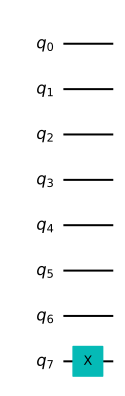

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

La extracción de resultados se puede hacer usando el circuito que teníamos antes: `qc_output`.

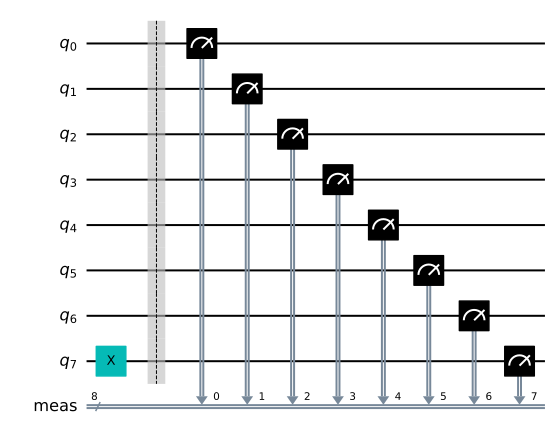

In [8]:
qc_encode.measure_all()
qc_encode.draw()

Ahora podemos ejecutar el circuito combinado y ver los resultados.

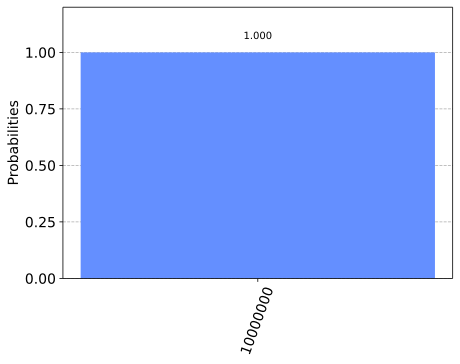

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Ahora nuestra computadora genera la cadena `10000000` en su lugar.

El bit que volteamos, que proviene del qubit 7, vive en el extremo izquierdo de la cadena. Esto se debe a que Qiskit numera los bits de una cadena de derecha a izquierda. Algunos prefieren numerar sus bits al revés, pero el sistema de Qiskit ciertamente tiene sus ventajas cuando usamos los bits para representar números. Específicamente, significa que el qubit 7 nos dice cuántos `2^7` tenemos en nuestro número. Entonces, al voltear este bit, ahora hemos escrito el número [[128|256|64|32]] en nuestra computadora simple de 8 bits.

Ahora intenta escribir otro número por ti mismo. Podrías hacer tu edad, por ejemplo. Simplemente, usa un motor de búsqueda para averiguar cómo se ve el número en binario (si incluye un '0b', simplemente ignóralo) y luego agrega algunos 0s al lado izquierdo si tienes menos de 128 años.

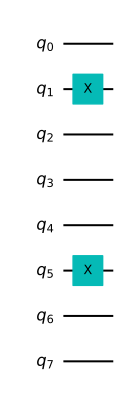

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

Ahora sabemos cómo codificar información en una computadora. El siguiente paso es procesarla: tomar una entrada que hemos codificado y convertirla en una salida que necesitemos.

### 4.2 Recordando cómo sumar <a id="remembering-add"></a>

Para ver cómo convertir las entradas en salidas, necesitamos un problema a resolver. Hagamos algunas matemáticas básicas. En la escuela primaria, habrás aprendido cómo tomar grandes problemas matemáticos y dividirlos en partes manejables. Por ejemplo, ¿cómo harías para resolver lo siguiente?

```code
   9213
+  1854
=  ????
```

Una forma de hacerlo es dígito por dígito, de derecha a izquierda. Así que empezamos con 3+4

```code
   9213
+  1854
=  ???7
```

Y luego 1+5

```code
   9213
+  1854
=  ??67
```

Entonces tenemos 2+8=10. Dado que esta es una respuesta de dos dígitos, debemos acarrear el uno sobre la siguiente columna.

```code
   9213
+  1854
=  ?067
   ¹
```

Finalmente tenemos 9+1+1=11, y obtenemos nuestra respuesta

```code
   9213
+  1854
= 11067
   ¹
```

Esto puede ser solo una simple suma, pero demuestra los principios detrás de todos los algoritmos. Ya sea que el algoritmo esté diseñado para resolver problemas matemáticos o procesar texto o imágenes, siempre dividimos las tareas grandes en pasos pequeños y simples.

Para ejecutarse en una computadora, los algoritmos deben compilarse en pasos más pequeños y simples posibles. Para ver cómo se ven, hagamos el problema de la suma anterior nuevamente, pero esta vez en binario.

```code
   10001111111101
+  00011100111110
                                    
=  ??????????????
```

Ten en cuenta que el segundo número tiene un montón de 0s adicionales a la izquierda. Esto solo sirve para que las dos cadenas tengan la misma longitud.

Nuestra primera tarea es hacer el 1+0 para la columna de la derecha. En binario, como en cualquier sistema numérico, la respuesta es 1. Obtenemos el mismo resultado para el 0+1 de la segunda columna.

```code
   10001111111101
+  00011100111110

=  ????????????11
```

A continuación, tenemos 1+1. Como seguramente sabrás, 1+1=2. En binario, el número 2 se escribe `10`, por lo que requiere dos bits. Esto significa que necesitamos acarrear el 1, tal como lo haríamos con el número 10 en decimal.

```code
   10001111111101
+  00011100111110
=  ???????????011
             ¹
```

La siguiente columna ahora requiere que calculemos `1+1+1`. Esto significa sumar tres números, por lo que las cosas se están complicando para nuestra computadora. Pero aún podemos compilarlo en operaciones más simples, y hacerlo de una manera que solo requiera que agreguemos dos bits juntos. Para esto, podemos comenzar con solo los dos primeros 1s.

```code
   1
+  1
= 10
```

Ahora debemos agregar este `10` al `1` final, lo que se puede hacer usando nuestro método habitual de pasar por las columnas.

```code
  10
+ 01
= 11
```

La respuesta final es `11` (también conocido como 3).

Ahora podemos volver al resto del problema. Con la respuesta de `11`, tenemos otro bit de acarreo.

```code
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

Así que ahora tenemos otro 1+1+1 que hacer. Pero ya sabemos cómo hacerlo, así que no es gran cosa.

De hecho, todo lo que queda hasta ahora es algo que ya sabemos hacer. Esto se debe a que, si descompones todo en sumar solo dos bits, solo hay cuatro cosas posibles que necesitarás calcular. Aquí están las cuatro sumas básicas (escribiremos todas las respuestas con dos bits para ser consistentes).

```code
0+0 = 00 (en decimal, esto es 0+0=0)
0+1 = 01 (en decimal, esto es 0+1=1)
1+0 = 01 (en decimal, esto es 1+0=1)
1+1 = 10 (en decimal, esto es 1+1=2)
```

Esto se llama *semisumador*. Si nuestra computadora puede implementar esto, y si puede encadenar muchos de ellos juntos, puede sumar cualquier cosa.

### 4.3 Sumar con Qiskit <a id="adding-qiskit"></a>

Hagamos nuestro propio semisumador usando Qiskit. Esto incluirá una parte del circuito que codifica la entrada, una parte que ejecuta el algoritmo y una parte que extrae el resultado. La primera parte habrá que cambiarla cada vez que queramos utilizar una nueva entrada, pero el resto permanecerá siempre igual.

![semisumador implementado en un circuito cuántico](images/half-adder.svg)


Los dos bits que queremos agregar están codificados en los qubits 0 y 1. El ejemplo anterior codifica un `1` en ambos qubits, por lo que busca encontrar la solución de `1+1`. El resultado será una cadena de dos bits, que leeremos de los qubits 2 y 3 y almacenaremos en los bits clásicos 0 y 1, respectivamente.

Las operaciones básicas de la computación se conocen como compuertas lógicas. Ya hemos usado la compuerta NOT, pero esto no es suficiente para hacer nuestro semisumador. Solo podíamos usarlo para escribir manualmente las respuestas. Dado que queremos que la computadora haga el cálculo real por nosotros, necesitaremos algunas compuertas más poderosas.

Para ver lo que necesitamos, echemos otro vistazo a lo que necesita hacer nuestro semisumador.

```code
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

El bit más a la derecha en las cuatro respuestas está completamente determinado por si los dos bits que estamos sumando son iguales o diferentes. Entonces, para `0+0` y `1+1`, donde los dos bits son iguales, el bit más a la derecha de la respuesta es [[0|1]]. Para `0+1` y `1+0`, donde estamos sumando diferentes valores de bit, el bit más a la derecha es [[1|0]].

Para que esta parte de nuestra solución sea correcta, necesitamos algo que pueda determinar si dos bits son diferentes o no. Tradicionalmente, en el estudio de la computación digital, esto se denomina [compuerta XOR](gloss:xor).

Entrada 1 | Entrada 2 | Salida XOR
:-: | :-: | :-:
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

En las computadoras cuánticas, el trabajo de la compuerta XOR lo realiza la compuerta NOT controlada. Dado que es un nombre bastante largo, generalmente la llamamos CNOT. En Qiskit su nombre es `cx`, que es aún más corto. En los diagramas de circuito, se dibuja como en la imagen de abajo.

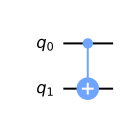

In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

Esto se aplica a un par de qubits. Uno actúa como el qubit de control (este es el que tiene el pequeño punto). El otro actúa como el *qubit objetivo* (con el círculo grande que tiene un `+` dentro).

Hay múltiples formas de explicar el efecto del CNOT. Una es decir que se fija en sus dos bits de entrada para ver si son iguales o diferentes. A continuación, sobrescribe el qubit objetivo con la respuesta. El objetivo se convierte en `0` si son iguales y `1` si son diferentes.

<img src="images/cnot_xor.svg">

Otra forma de explicar el CNOT es decir que hace un NOT en el objetivo si el control es `1` y no hace nada en caso contrario. Esta explicación es tan válida como la anterior (de hecho, es la que da nombre a la compuerta).

Prueba el CNOT tu mismo intentando con cada una de las entradas posibles. Por ejemplo, aquí hay un circuito que prueba el CNOT con la entrada `01`.

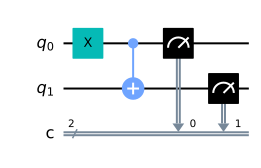

In [12]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

Si ejecutas este circuito, encontrarás que la salida es `11`. Podemos pensar que esto sucede por cualquiera de las siguientes razones.

- El CNOT calcula si los valores de entrada son diferentes y descubre que lo son, lo que significa que quiere generar un `1`. Para ello, escribe sobre el estado del qubit 1 (que, recuerda, está a la izquierda de la cadena de bits), convirtiendo `01` en `11`.

- El CNOT ve que el qubit 0 está en el estado `1`, por lo que aplica un NOT al qubit 1. Esto convierte el `0` del qubit 1 en un `1`, por lo que convierte `01` en `11`.

Aquí hay una tabla que muestra todas las entradas posibles y las salidas correspondientes de la compuerta CNOT:

Entrada (q1 q0) | Salida (q1 q0)
:-: | :-:
00 | 00
01 | 11
10 | 10
11 | 01

Para nuestro semisumador, no queremos sobrescribir una de nuestras entradas. En cambio, queremos escribir el resultado en un par diferente de qubits. Para ello, podemos utilizar dos CNOT.

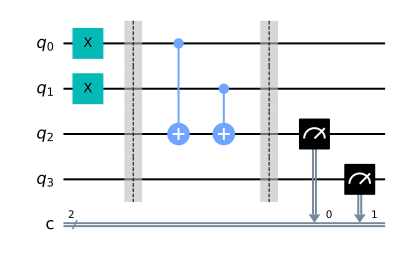

In [13]:
qc_ha = QuantumCircuit(4,2)
# codificar las entradas en los qubits 0 y 1
qc_ha.x(0) # Para a=0, remover esta línea. Para a=1, dejarla.
qc_ha.x(1) # Para b=0, remover esta línea. Para b=1, dejarla
qc_ha.barrier()
# usar cnots para escribir el XOR de las entradas en el qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extraer las salidas
qc_ha.measure(2,0) # extraer el valor del XOR
qc_ha.measure(3,1)

qc_ha.draw()

Ahora estamos a mitad de camino hacia un semisumador completamente funcional. Solo nos queda por hacer la otra parte de la salida: la que vivirá en qubit 3.

Si vuelves a mirar las cuatro sumas posibles, notarás que solo hay un caso para el que es `1` en lugar de `0`: `1+1`=`10`. Ocurre solo cuando los dos bits que estamos agregando son `1`.

Para calcular esta parte de la salida, podríamos simplemente hacer que nuestra computadora examinara si ambas entradas son `1`. Si lo son, y solo si lo son, necesitamos aplicar una compuerta NOT en el qubit 3. Eso lo cambiará al valor requerido de `1` solamente para este caso, dándonos la salida que necesitamos.

Para esto, necesitamos una nueva compuerta: como un CNOT pero controlado en dos qubits en lugar de solo uno. Esto realizará un NOT en el qubit objetivo solo cuando ambos controles estén en el estado `1`. Esta nueva compuerta se llama [Toffoli](gloss:toffoli). Para aquellos de ustedes que están familiarizados con las compuertas lógicas Booleanas, es básicamente una compuerta AND.

En Qiskit, la Toffoli se representa con el comando `ccx`.

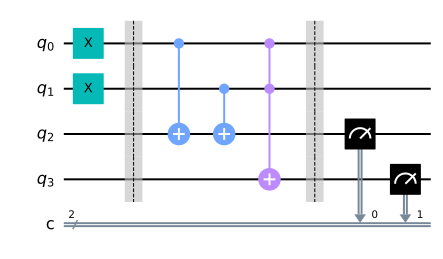

In [14]:
qc_ha = QuantumCircuit(4,2)
# codificar las entradas en los qubits 0 y 1
qc_ha.x(0) # Para a=0, remover esta línea. Para a=1, dejarla.
qc_ha.x(1) # Para b=0, remover esta línea. Para b=1, dejarla.
qc_ha.barrier()
# usar cnots para escribir el XOR de las entradas en el qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# usar ccx para escribir el AND de las entradas en el qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extraer las salidas
qc_ha.measure(2,0) # extraer el valor del XOR
qc_ha.measure(3,1) # extraer el valor del AND

qc_ha.draw()

En este ejemplo, estamos calculando `1+1`, porque los dos bits de entrada son ambos `1`. Veamos qué obtenemos.

/home/divs/.local/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


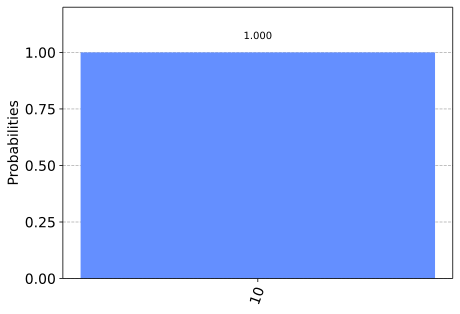

In [15]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

El resultado es `10`, que es la representación binaria del número 2. ¡Hemos construido una computadora que puede resolver el famoso problema matemático de 1+1!

Ahora puedes probarlo con las otras tres entradas posibles y demostrar que nuestro algoritmo también da los resultados correctos para ellas.

El semisumador contiene todo lo que necesitas para sumar. Con las compuertas NOT, CNOT y Toffoli, podemos crear programas que suman cualquier conjunto de números de cualquier tamaño.

Estas tres compuertas también son suficientes para hacer todo lo demás en computación. De hecho, incluso podemos prescindir del CNOT. Además, la compuerta NOT solo es realmente necesaria para crear bits con valor `1`. La compuerta Toffoli es esencialmente el átomo de las matemáticas. Es el elemento más simple, a partir del cual se pueden compilar todas las demás técnicas de resolución de problemas.

Como veremos, en la computación cuántica dividimos el átomo.

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table

/home/divs/.local/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.2
qiskit-aer,0.9.0
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.5
qiskit,0.30.0
qiskit-nature,0.2.1
qiskit-finance,0.2.1
qiskit-optimization,0.2.2
qiskit-machine-learning,0.2.1
